In [55]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []


        for sdm in sdms:
            mean_newvalue_hist[scenario][sdm] = {}
            mean_newvalue_fut[scenario][sdm] = {}
            mean_sumbin_hist[scenario][sdm] = {}
            mean_sumbin_fut[scenario][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][sdm][gcm] = {}
                mean_newvalue_fut[scenario][sdm][gcm] = {}
                mean_sumbin_hist[scenario][sdm][gcm] = {}
                mean_sumbin_fut[scenario][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



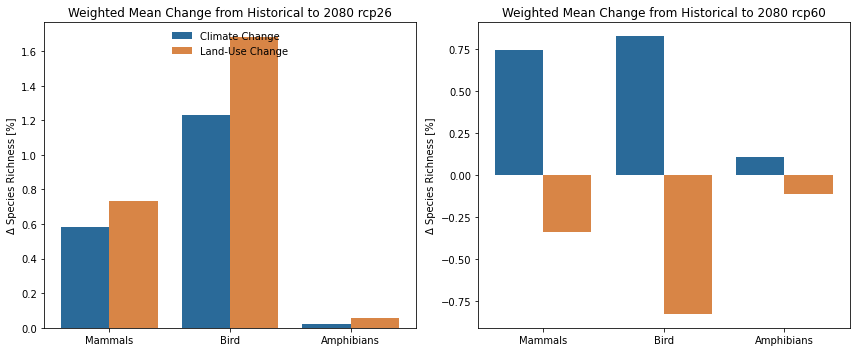

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# ... [previous setup code]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))

for j, scenario in enumerate(scenarios):
    ax = axes[j]

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        diff_newvalue = mean_over_all_sdms_gcms_fut[scenario][taxa] - mean_over_all_sdms_gcms_hist[scenario][taxa]

        diff_sumbin = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] - mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        # Convert to Python scalars
        diff_newvalue_mean = diff_newvalue.mean().item()  # Assuming diff_newvalue is an xarray DataArray
        diff_sumbin_mean = diff_sumbin.mean().item()      # Assuming diff_sumbin is an xarray DataArray
        

        # Create the bars
        ax.bar(x_shift - bar_width/2, diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change)
        ax.bar(x_shift + bar_width/2, diff_sumbin_mean, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness [%]')
    ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


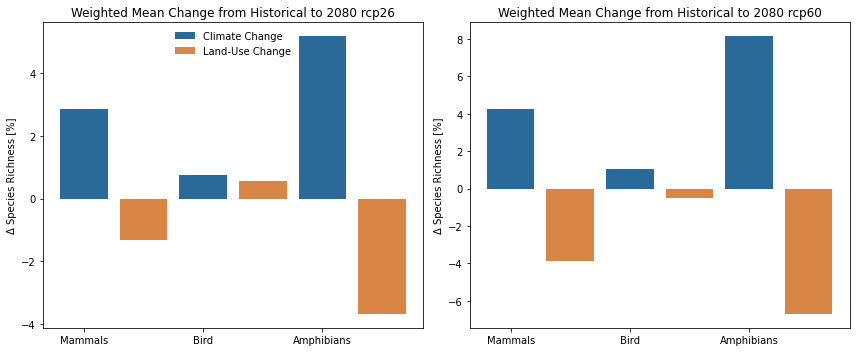

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# ... [previous setup code]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        # Calculate the relative difference safely
        
        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        rel_diff_newvalue = xr.where(newvalue_hist != 0, (newvalue_future - newvalue_hist) / newvalue_hist_filtered * 100, 0)
        rel_diff_newvalue_mean = rel_diff_newvalue.mean()
        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        rel_diff_sumbin  = xr.where(sumbin_hist != 0, (sumbin_future - sumbin_hist) / sumbin_hist_filtered * 100, 0).mean()

        rel_diff_sumbin = rel_diff_sumbin -rel_diff_newvalue.mean()

        # Create the bars
        ax.bar(x_shift , rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change)
        ax.bar(x_shift +0.5, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)


    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness [%]')
    ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


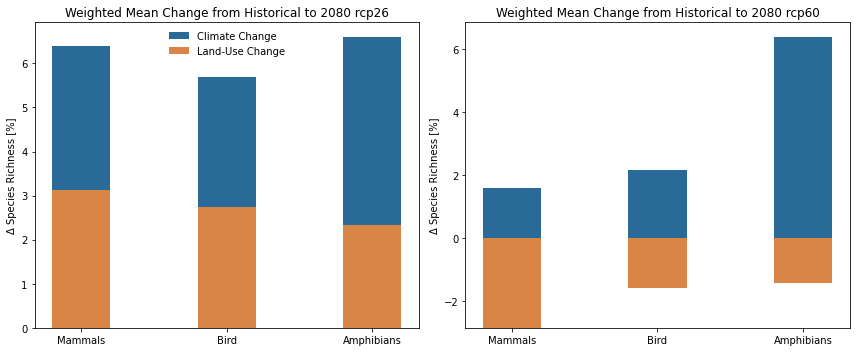

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# ... [previous setup code]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)


        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)


        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()

        # Create the bars
        ax.bar(x_shift , rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)


    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness [%]')
    ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


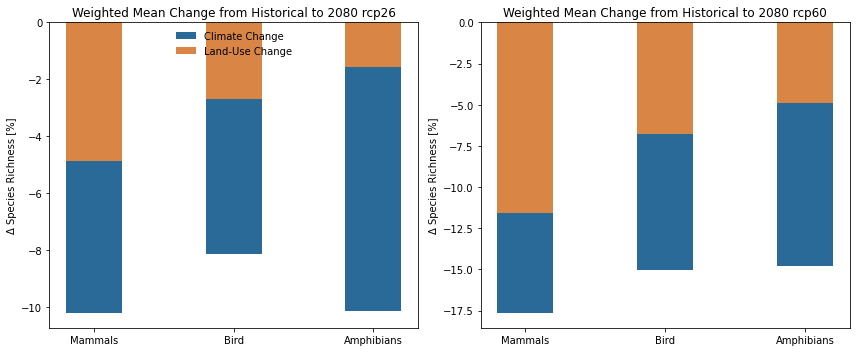

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ... [previous setup code]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()

        
        
        
        
        
        # Create the bars
        ax.bar(x_shift , rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)


    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness [%]')
    ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


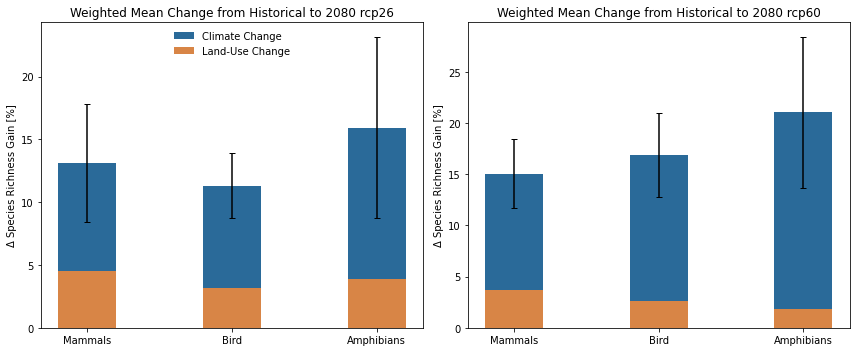

In [112]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    

    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []
        mean_newvalue_hist[scenario][taxa] = {}
        mean_newvalue_fut[scenario][taxa] = {}
        mean_sumbin_hist[scenario][taxa] = {}
        mean_sumbin_fut[scenario][taxa] = {}
        
        mean_over_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_fut[scenario][taxa] = {}

        mean_over_all_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_fut[scenario] [taxa]= {}

        for sdm in sdms:
            mean_newvalue_hist[scenario][taxa][sdm] = {}
            mean_newvalue_fut[scenario][taxa][sdm] = {}
            mean_sumbin_hist[scenario][taxa][sdm] = {}
            mean_sumbin_fut[scenario][taxa][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = {}
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][taxa][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][taxa][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][taxa][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')


    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness Gain [%]')
    ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


In [96]:
mean_newvalue_fut[scenario][sdm][gcm]

<xarray.DataArray 'newvalue' (lat: 360, lon: 720)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

In [51]:
std_dev_newvalue

[1.210884839152321]

In [48]:
taxa

'Amphibians'

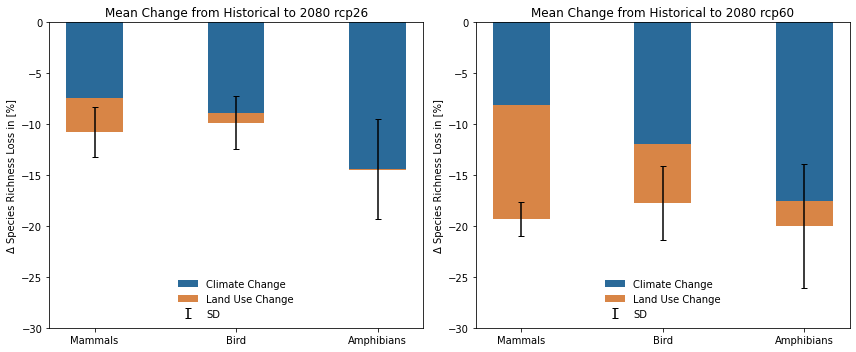

<Figure size 432x288 with 0 Axes>

In [64]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals", "Bird", "Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26","rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

# Load pickled data
mean_newvalue_change = {}
mean_sum_bin_change = {}
mean_land_use_change = {}

for scenario in scenarios:
    mean_newvalue_change[scenario] = {}
    mean_sum_bin_change[scenario] = {}
    mean_land_use_change[scenario] = {}

    for sdm in sdms:
        mean_newvalue_change[scenario][sdm] = {}
        mean_sum_bin_change[scenario][sdm] = {}
        mean_land_use_change[scenario][sdm] = {}

        for gcm in gcms:
            mean_newvalue_change[scenario][sdm][gcm] = {}
            mean_sum_bin_change[scenario][sdm][gcm] = {}
            mean_land_use_change[scenario][sdm][gcm] = {}

            for taxa in taxas:
                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}'].pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_sum_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_sum_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_sum_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_sum_taxa = pickle.load(f)

                                # Avoid division by zero
                            # Handle missing values (if necessary)
                # Calculate the difference
                difference = newvalue_future_sum_taxa - newvalue_hist_sum_taxa

                # Identify where there is a loss (future < historical)
                loss_mask = difference < 0

                # Non-zero mask for the historical data to avoid division by zero
                non_zero_mask = newvalue_hist_sum_taxa != 0

                # Calculate relative loss only for loss cases
                # Use xr.where to apply the loss_mask and non_zero_mask
                climate_change = xr.where(loss_mask & non_zero_mask, difference / newvalue_hist_sum_taxa * 100, 0)

                # Repeat similar steps for sum_bin data


                
                                # Calculate the difference
                difference = sum_bin_future_sum_taxa - sum_bin_hist_sum_taxa

                # Identify where there is a loss (future < historical)
                loss_mask = difference < 0

                # Non-zero mask for the historical data to avoid division by zero
                non_zero_mask = sum_bin_hist_sum_taxa != 0

                # Calculate relative loss only for loss cases
                # Use xr.where to apply the loss_mask and non_zero_mask
                climate_land_change = xr.where(loss_mask & non_zero_mask, difference / sum_bin_hist_sum_taxa * 100, 0)

                # Repeat similar steps for sum_bin data


                land_use_change = climate_land_change - climate_change

                climate_land_change_loss = climate_land_change.where(climate_land_change < 0)
                climate_change_loss = climate_change.where((climate_land_change < 0) & (climate_change < 0))


                # Store mean changes in dictionaries
                mean_newvalue_change[scenario][sdm][gcm][taxa] = climate_change_loss
                mean_sum_bin_change[scenario][sdm][gcm][taxa] = climate_land_change_loss
                mean_land_use_change[scenario][sdm][gcm][taxa] = land_use_change

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas))

# Create a variable to store the handles and labels for the legend
handles, labels = [], []

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    scenario_handles, scenario_labels = [], []  # Separate lists for each scenario

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]

       # mean_climate_change = np.median([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
       # mean_land_use_change2 = np.median([np.mean(mean_sum_bin_change[scenario][sdm][gcm][taxa] - mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])

        #std_dev_climate_change = np.std([np.mean(mean_newvalue_change[scenario][sdm][gcm][taxa]) for sdm in sdms for gcm in gcms])
        
        
        climate_change_data = np.concatenate([mean_newvalue_change[scenario][sdm][gcm][taxa].values.flatten() for sdm in sdms for gcm in gcms])
        land_use_change_data = np.concatenate([mean_sum_bin_change[scenario][sdm][gcm][taxa].values.flatten() for sdm in sdms for gcm in gcms])

        # Calculate the median for the concatenated data
        mean_climate_change = np.nanmean(climate_change_data)
        mean_land_use_change2 = np.nanmean(land_use_change_data) -mean_climate_change
        

        std_dev_climate_change = np.std([np.nanmean(mean_newvalue_change[scenario][sdm][gcm][taxa].values)for sdm in sdms for gcm in gcms])


        if not i:
            handle_climate_change = ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change, label='Climate Change')
            handle_land_use_change = ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change, label='Land Use Change')
            handle_error = ax.errorbar(x_shift, mean_climate_change+ mean_land_use_change2, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black', label='SD')

            # Extend the scenario-specific lists
            scenario_handles.extend([handle_climate_change, handle_land_use_change, handle_error])
            scenario_labels.extend(['Climate Change', 'Land Use Change', 'SD'])

        else:
            ax.bar(x_shift, mean_climate_change, capsize=5, width=bar_width, color=color_change)
            ax.bar(x_shift, mean_land_use_change2, capsize=5, width=bar_width, color=color_land_use_change, bottom=mean_climate_change)
            ax.errorbar(x_shift, mean_climate_change+ mean_land_use_change2, yerr=std_dev_climate_change, fmt='none', capsize=3, color='black')

    # Extend the main lists with scenario-specific entries
    handles.extend(scenario_handles)
    labels.extend(scenario_labels)
#for ax in axes:
    ax.set_ylim(top=0, bottom=-30)
    #ax.set_yticks(np.arange(0, -26, -5))
    # Set plot details
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('\u0394 Species Richness Loss in [%]')
    ax.legend(handles=scenario_handles, labels=scenario_labels, frameon=False, loc='lower center')
    ax.set_title(f'Mean Change from Historical to {year_indices[time_ind]} {scenario}')

# Set the final legend outside the loop
#fig.legend(handles=handles, labels=labels, frameon=False, loc='lower center')

plt.tight_layout()
plt.show()
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time_ind]}_loss_rel.png")
    #